In [40]:
%matplotlib inline
import numpy as np
import pandas as pd

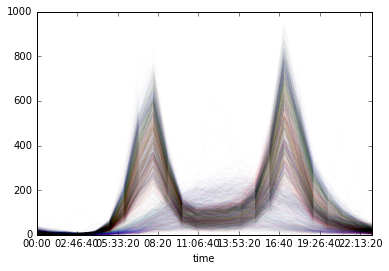

In [2]:
from jflow.data import get_data
df = get_data()
pivoted = df.pivot_table('T ;otal', index=df.index.time, columns=df.index.date)
pivoted.plot(legend=False, alpha=0.01)

something has gone wrong.  There should be 2 peaks just as before. 

In [3]:
pivoted.index

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

hey, wait, there are onlyu 12 hours.  Not 24.

In [4]:
np.unique(df.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)], dtype=object)

In [5]:
!head -24 fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291
10/03/2012 09:00:00 AM,104,172
10/03/2012 10:00:00 AM,46,72
10/03/2012 11:00:00 AM,32,10
10/03/2012 12:00:00 PM,41,35
10/03/2012 01:00:00 PM,48,42
10/03/2012 02:00:00 PM,51,77
10/03/2012 03:00:00 PM,92,72
10/03/2012 04:00:00 PM,182,133
10/03/2012 05:00:00 PM,391,192
10/03/2012 06:00:00 PM,258,122
10/03/2012 07:00:00 PM,69,59
10/03/2012 08:00:00 PM,51,29
10/03/2012 09:00:00 PM,38,25
10/03/2012 10:00:00 PM,25,24


In [6]:
pivoted.shape

(24, 2250)

In [18]:
X = pivoted.fillna(0).T.values #this converts it to an array
X.shape

(2250, 24)

In [10]:
pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00:00:00 to 23:00:00
Columns: 2250 entries, 2012-10-03 to 2018-11-30
dtypes: float64(2250)
memory usage: 422.1+ KB


In [16]:
np.info(X)

class:  ndarray
shape:  (2250, 24)
strides:  (8, 18000)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x21e42c99f10
byteorder:  little
byteswap:  False
type: float64


Transposing the dataframe... each day is an observation which consists of 24 hours. What are the days in relationship to each other.

Do PCA on it. To reduce the dimensionality.

In [ ]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

X2.shape

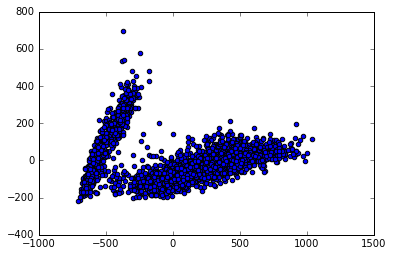

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

from the dimensionality reduction, it looks like we have two different days.

In [29]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

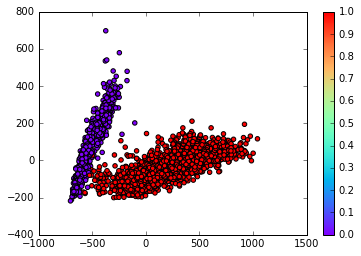

In [35]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

what is going on within each of these clusters?

Where labels is the red cluster, 0

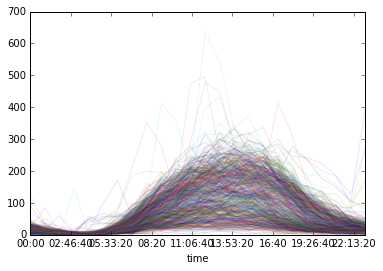

In [36]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)
#shows non-commute rides

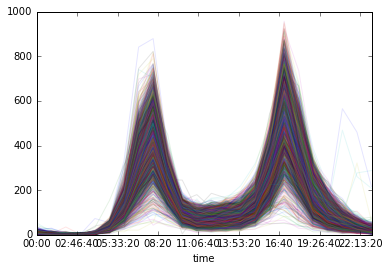

In [37]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

Are they really week days and week ends?

In [38]:
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2018-11-21, 2018-11-22, 2018-11-23, 2018-11-24, 2018-11-25, 2018-11-26,
       2018-11-27, 2018-11-28, 2018-11-29, 2018-11-30],
      dtype='object', length=2250)

we want to convert the days to days of the week.

In [42]:
pd.DatetimeIndex(pivoted.columns)

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', length=2250, freq=None)

In [43]:
pd.DatetimeIndex(pivoted.columns).dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', length=2250)

In [44]:
dow = pd.DatetimeIndex(pivoted.columns).dayofweek

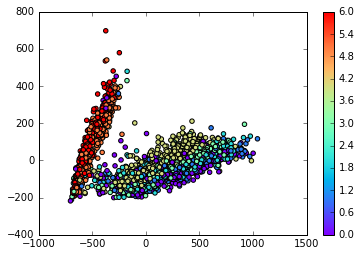

In [45]:
plt.scatter(X2[:, 0], X2[:, 1], c=dow, cmap='rainbow')
plt.colorbar()

In [50]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dow < 5)]
#this ends up showing holidays, xmas, days when people don't work

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-11-22', '2018-11-23'],
              dtype='datetime64[n